Name: Tran Thai Duc Hieu  
4-digit code: 8f95  
Email: t.tran@oth-aw.de  

# Used source
Used source is described in **used_source.ipynb**

# 4. Data quality check

## Walking data

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FILE_PATH = 'data_record/data.csv'

def loadData(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)    
    return data


In [33]:
walking_data = loadData(FILE_PATH)
walking_data[:, 0] = walking_data[:, 0] - walking_data[0, 0]

timestamp = walking_data[:,0]

# Calculate the time difference between each sample
d = timestamp[1:] - timestamp[:-1]
time_diff = pd.DataFrame(d, columns=['time_diff'])
time_diff.describe()

,time_diff
count,6337.000000
mean,20.327915
std,3.439424
min,11.000000
25%,17.000000
50%,21.000000
75%,21.000000
max,37.000000


Unique sampling intervals:
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37.]
Counts of unique sampling intervals:
 [   9   45   70   70  104  267 1083  300  322  626 1937  416  204  126
   96  380  114   38   27   28   26   29   11    1    2    5    1]
---------------------------------
Intervals values that appear more than 100 times:
 [15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 26. 27.]
Counts of most frequent sampling intervals:
 [ 104  267 1083  300  322  626 1937  416  204  126  380  114]


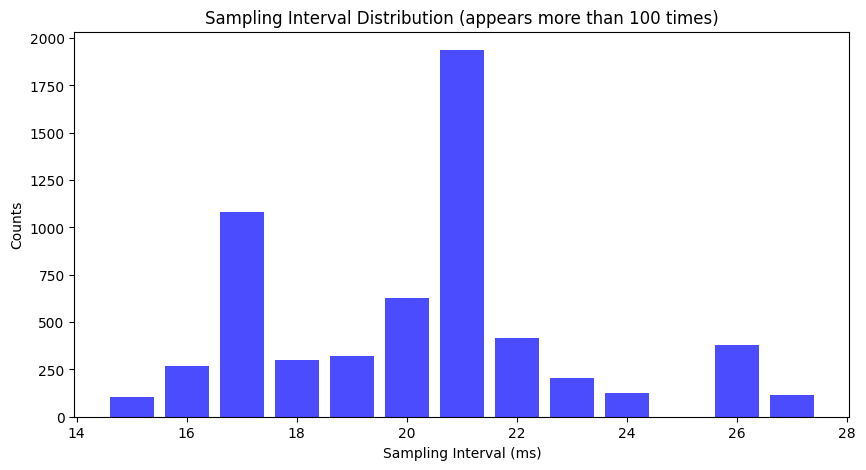

In [34]:
values, counts = np.unique(d, return_counts=True)
print('Unique sampling intervals:\n',values)
print('Counts of unique sampling intervals:\n',counts)
print('---------------------------------')

rate_significant = values[counts > 100]
counts_significant = counts[counts > 100]
print('Intervals values that appear more than 100 times:\n', rate_significant)    
print('Counts of most frequent sampling intervals:\n', counts_significant)

# Plot the sampling intervals   
plt.figure(figsize=(10,5))
plt.bar(rate_significant, counts_significant, color='blue', alpha=0.7)
plt.xlabel('Sampling Interval (ms)')
plt.ylabel('Counts')
plt.title('Sampling Interval Distribution (appears more than 100 times)')
plt.show()



In [35]:
most_frequent_interval_mean = np.mean(rate_significant)
print('Sampling rate (Hz) = 1 / sampling_interval(s)')
print(f'Sampling rate (Hz) = 1 / ({most_frequent_interval_mean} / 1000)')
print(f'Sampling rate (Hz) = {1000 / most_frequent_interval_mean:.2f} Hz')

Sampling rate (Hz) = 1 / sampling_interval(s)
Sampling rate (Hz) = 1 / (20.666666666666668 / 1000)
Sampling rate (Hz) = 48.39 Hz


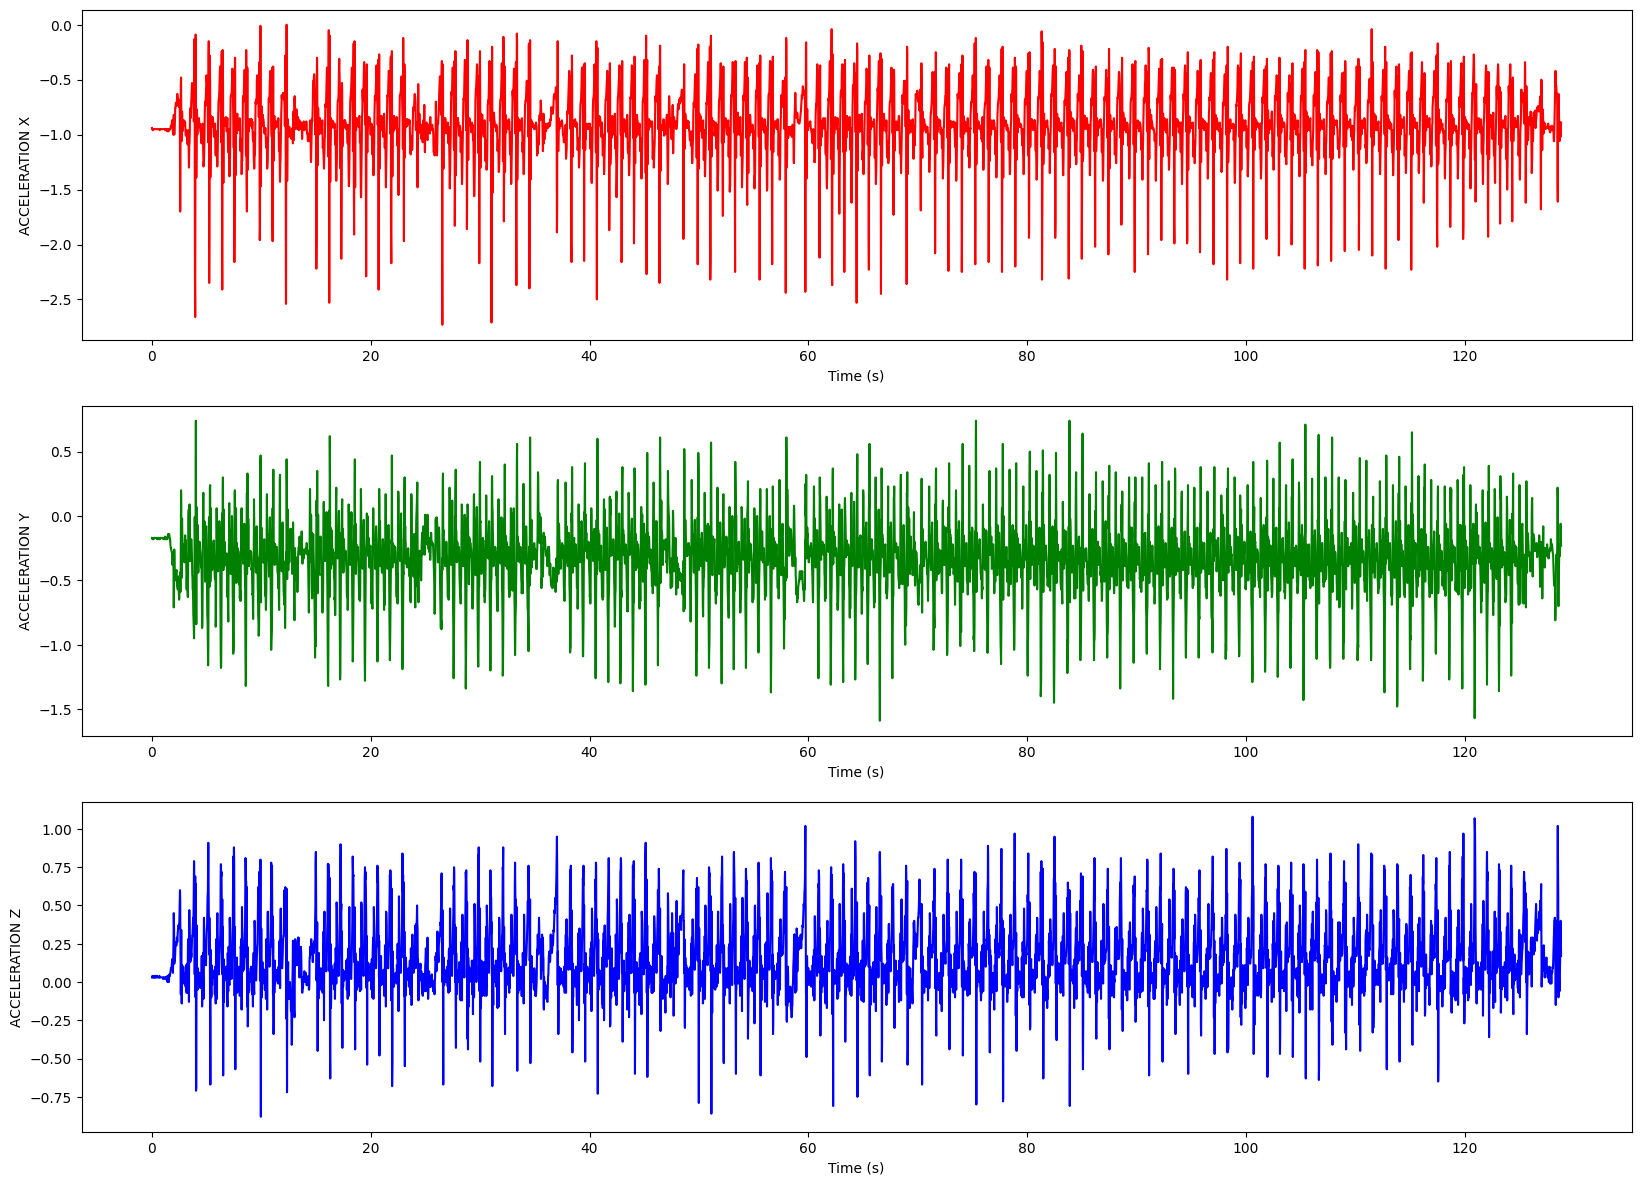

In [36]:
def plotData2(data):
    # Desciption: 
    # Plot all three axes of acceleration, angular velocity
    
    time = data[:, 0] / 1000  # Convert to seconds

    data_dict = {
        'acceleration': data[:, 1:4],
    }

    plt.figure(figsize=(20, 30))

    row = 1
    for key in ['acceleration']:
        for i, data_axis in enumerate(['x', 'y', 'z']):
            plt.subplot(6, 1, row)
            plt.plot(time, data_dict[key][:, i], color='r' if i == 0 else 'g' if i == 1 else 'b')
            plt.ylabel(key.upper() + ' ' + data_axis.upper())
            plt.xlabel('Time (s)')
            row = row + 1

    plt.show() 

plotData2(walking_data)